In [ ]:
pip install  dummy

ERROR: Could not find a version that satisfies the requirement dummy (from versions: none)
ERROR: No matching distribution found for dummy


In [ ]:
import pandas as pd
import numpy as np

##O objetivo é reduzir o número de exames necessários para o diagnóstico de câncer, com essa ideia iremos pegar dados fictícios, mas que poderiam ser reais.
##O mais importante são as técnicas e métodos utilizados para fazer isso acontecer.

In [ ]:
resultados_exames = pd.read_csv("dados/exames.csv") #mudar caminho dps
resultados_exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


## Antes de qualquer coisa, como sempre temos que nos preocupar com o estado que a base de dados chega para nós. Então é totalmente válido, uma verificação dos dados faltantes.

In [ ]:
#Verificando se existe célula vazia (NaN).isnull() retornara True ou False.
# O .sum() ira somar a coluna(como a coluna true vale 1 saberei quais colunas tem valores nulos)
resultados_exames.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [ ]:
#RandomForest é um conjunto de arvores de decisão.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
#Criar um modelo com todos os exames, segregando entre treino e teste

from numpy import random
SEED = 200
random.seed(SEED)

valores_exames = resultados_exames.drop(columns = ['id','diagnostico'])
diagnostico = resultados_exames.diagnostico
valores_exames_v1 = valores_exames.drop(columns = 'exame_33') # Estou tirando a coluna que tem nulos

def classificador(valores):
  SEED = 200
  random.seed(SEED)
  treino_x, teste_x,treino_y,teste_y = train_test_split(valores, 
                                                      diagnostico,
                                                      test_size = 0.3)


  classificador = RandomForestClassifier(n_estimators=100)

  classificador.fit(treino_x,treino_y) # Ja podemos ajustar nosso classificador
  print("Result = %.2f%%" %(classificador.score(teste_x,teste_y)*100))
classificador(valores_exames_v1)

Result = 95.91%


## Sera que esse valor é realmente um valor  real? Para ter certeza temos que validar!

In [ ]:
from sklearn.dummy import DummyClassifier

SEED = 200
random.seed(SEED)

treino_x, teste_x,treino_y,teste_y = train_test_split(valores_exames, 
                                                    diagnostico,
                                                    test_size = 0.3)

classificado_dummy = DummyClassifier(strategy= 'most_frequent')
classificado_dummy.fit(treino_x, treino_y)
print("Classification Result = %.2f%%" %(classificado_dummy.score(teste_x,teste_y)*100))

Classification Result = 67.84%


In [ ]:
valores_exames_v1.head()

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

ajuste = StandardScaler() # Vamos normalizar valores antes de plotar... *( faz muita diferença pois sem isso  o gráfico ficaria ilegível)
ajuste.fit(valores_exames_v1)
valores_exames_v2 = ajuste.transform(valores_exames_v1)
valores_exames_v2 = pd.DataFrame(data = valores_exames_v2,
                                columns = valores_exames_v1.keys() )

def grafico_violino(valores, inicio, fim):


  dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:,inicio:fim]], axis = 1)
  dados_plot = pd.melt(dados_plot, id_vars = 'diagnostico',
                      var_name= 'exames',
                      value_name = 'valores')

  plt.figure(figsize=(10, 10))
  sns.violinplot(x = 'exames', y = 'valores',hue = 'diagnostico',
                  data = dados_plot, split = True)
  plt.xticks(rotation = 90)

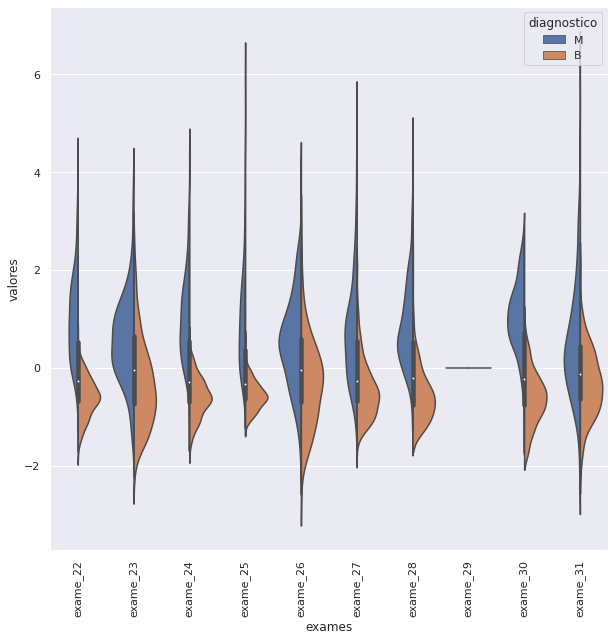

In [ ]:
grafico_violino(valores_exames_v2,21, 31)

### O que o gráfico quer dizer? Após separar os gráficos pela cor entre benigno e maligno, podemos perceber que os exames onde suas cristas têm uma distância relativamente boa uma da outra, são os exames que tem o melhor desempenho para diagnosticar o câncer, se o pico entre elas (as cristas) como no caso 26 estão perto uma da outra, fica difícil fazer esse diagnostico. Ou seja, o melhor gráfico no nosso caso é o mais distribuído.

**Outra observação é que encontramos colunas com valores constantes e para saber se retirando-as terei um resultado melhor irei testar.**

In [ ]:
valores_exames_v3 = valores_exames_v2.drop(columns = ['exame_4','exame_29'])
classificador(valores_exames_v3)

Result = 94.74%


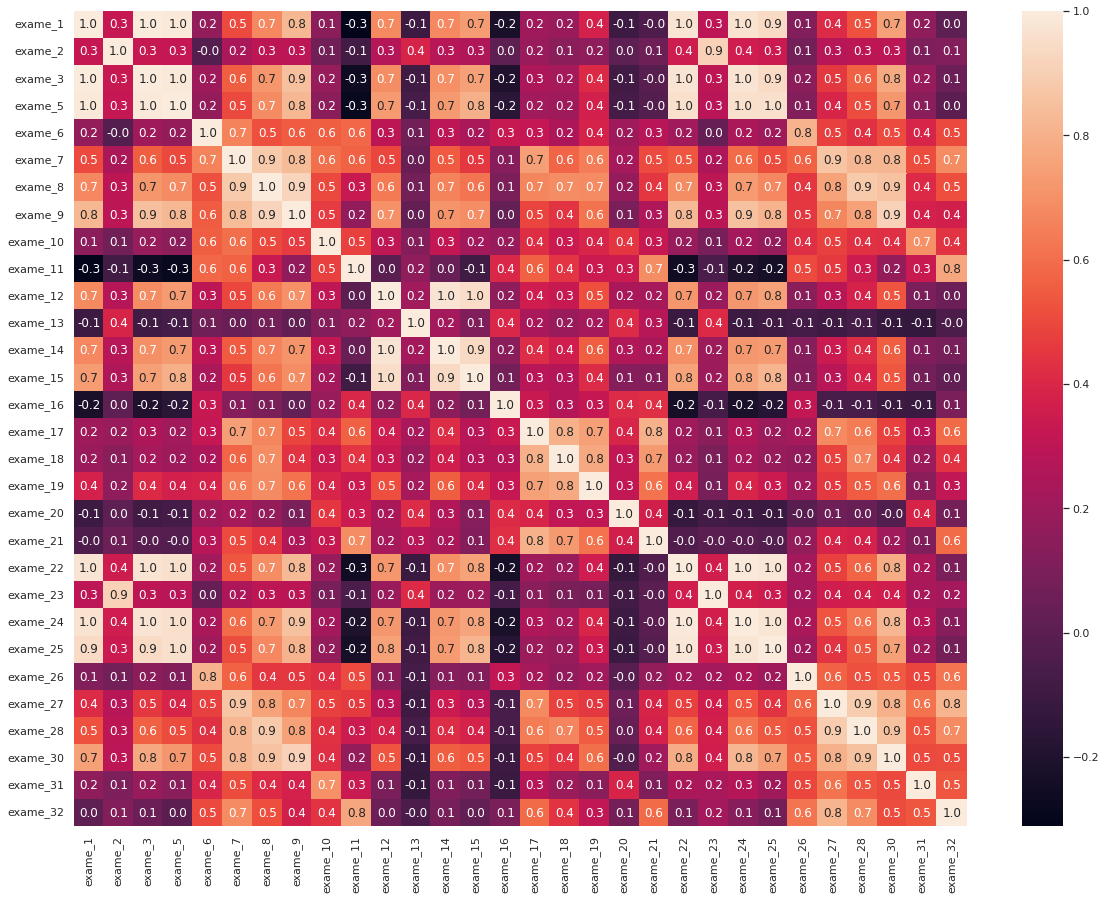

In [ ]:
matriz_correlacao =  valores_exames_v3.corr()
plt.figure(figsize = (20, 15))
sns.heatmap(matriz_correlacao, annot = True, fmt = '.1f')  #annot mostra a correlação em cada quadrado, fmt mostra apenas em uma casa decimal.

### Para entendermos uma heatmap de correlação temos que saber que as cores mais claras indicão maior correlação, ignorando a diagonal(pois é a correlação da variável pela própria variável). Pensando nisso temos um problema, pois quando usamos treinar um modelo, utilizando "dados parecidos" (correlacionados) acabamos colocando um certo peso maior, deixando o modelo tendencioso. Por isso o ideal é retirar as features com maior correlação e treinar novamente para ter uma acurácia melhor.

In [ ]:
matriz_correlacao_v1 =  matriz_correlacao[matriz_correlacao>0.99]
matriz_correlacao_v1.head()

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
matriz_correlacao_v2 = matriz_correlacao_v1.sum() # somando as colunas onde tem valores acima de 0.99, temos somente os exames com maior correlação
matriz_correlacao_v2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [ ]:
var_corr =  matriz_correlacao_v2[matriz_correlacao_v2>1] # Todos acima de 1 já que foram somados, são as nossas colunas que poluem nosso treinamento.
var_corr

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [ ]:
valores_exames_v4 = valores_exames_v3.drop(columns = var_corr.keys()[::2]) # Retirar uma de cada, pois, por exemplo, exame_1 e exame_3 tem dados muito parecidos.
classificador(valores_exames_v4)

Result = 97.08%


In [ ]:
valores_exames_v4.head()

,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


### Depois de várias análises minuciosas, conseguimos entender a necessidade de cada exame, mas sera que eu consigo selecionar o melhor 'k' para as features do conjunto? Por isso irei utilizar o SelectKBest e nele eu passo o número de exames que eu quero utilizar, no exemplo abaixo eu peço um retorno de apenas 4 exames.


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selecionar_k = SelectKBest(chi2, k=4) # Ou seja,  de todos exames eu quero que apenas ter o retorno de 4
                                      # OBS: Tendo o objetivo de manter a qualidade de diagnóstico, claro.
SEED = 200
random.seed(SEED)
valores_exames_v1.drop(columns = var_corr.keys()[::2] )# chi2 não aceita valores negativos entao vou deixar o dataset não normalizado de entrada.
treino_x, teste_x,treino_y,teste_y = train_test_split(valores_exames_v1, 
                                                    diagnostico,
                                                    test_size = 0.3)
selecionar_k.fit(treino_x,treino_y)
treino_kbest = selecionar_k.transform(treino_x)
teste_kbest = selecionar_k.transform(teste_x)

classificador = RandomForestClassifier(n_estimators= 100 , random_state= 200)
classificador.fit(treino_kbest, treino_y)
print("Classification Result = %.2f%%" %(classificador.score(teste_kbest,teste_y)*100))

Classification Result = 90.64%


In [ ]:
teste_kbest.shape

(171, 4)

## Vamos criar uma matriz de confusão, assim podemos entender melhor como o classificador esta se comportando.

[Text(66.5, 0.5, 'Real'), Text(0.5, 48.5, 'Predição')]

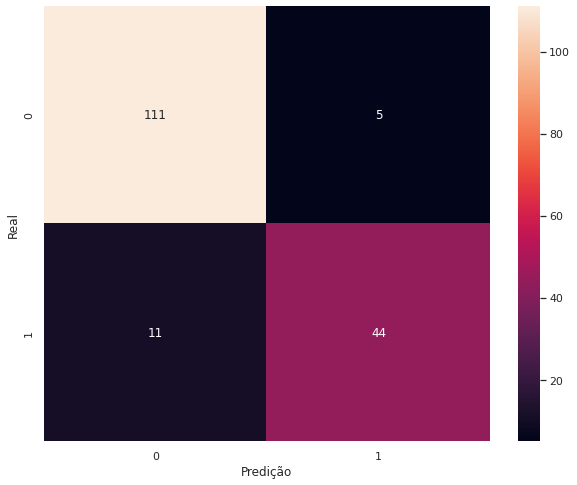

In [ ]:
from sklearn.metrics import confusion_matrix

matriz_confusion = confusion_matrix(teste_y, classificador.predict(teste_kbest))

plt.figure(figsize = (10,8))
sns.set()
sns.heatmap(matriz_confusion, annot= True, fmt = "d").set(xlabel = 'Predição', ylabel = 'Real')

### Aqui podemos entender que de  116 casos de benigno o algoritmo acertou 111 e de 55 de maligno, acertamos 44.

---



### Seleção com RFE (recursive feature elimination), essa seleção é feita com a comparação de pontos de cada feature, sabendo quanto cada um vale nos descartamos a de menor pontuação, para facilitar imagine um ranking das suas features, a seleção vai eliminar todas ate sobrar apenas o melhor.

Resultado da classificação 95.32%


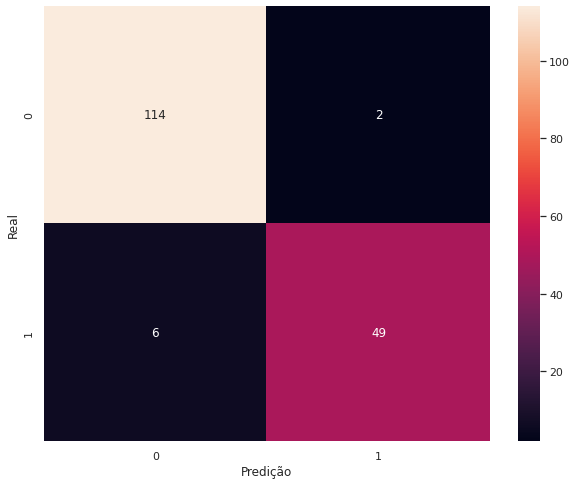

In [ ]:
from sklearn.feature_selection import RFE

SEED= 200
random.seed(SEED)

valores_exames_v5 = valores_exames_v1.drop(columns = ['exame_4','exame_29']) 
valores_exames_v6 = valores_exames_v5.drop(columns = var_corr.keys()[::2])   

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v4, 
                                                        diagnostico,
                                                        test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=200)
classificador.fit(treino_x, treino_y)
selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 5, step = 1) # vamos nos limitar em usar apenas 5 features
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)
classificador.fit(treino_rfe, treino_y)

matriz_confusao = confusion_matrix(teste_y,classificador.predict(teste_rfe))
plt.figure(figsize = (10, 8))
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel= "Real")

print("Resultado da classificação %.2f%%" %(classificador.score(teste_rfe,teste_y)*100))

### Fica claro que o algoritmo consegue se comportar muito melhor, mesmo assim vou apresentar outras opções, mais complexas, mas que podem inclusive ter resultados bem melhores.

##**RFECV(Recursive feature elimination with cross-validation).**

## O RFECV tem a função de fazer praticamente a mesma coisa que no algoritmo de RFE, mas agora fazendo uma separação por grupos, ou seja, vamos escolher o melhor conjunto de features ao invés uma única melhor. Logo vamos selecionar o melhor grupo de features possível para o treinamento.

Resultado da classificação 95.91%


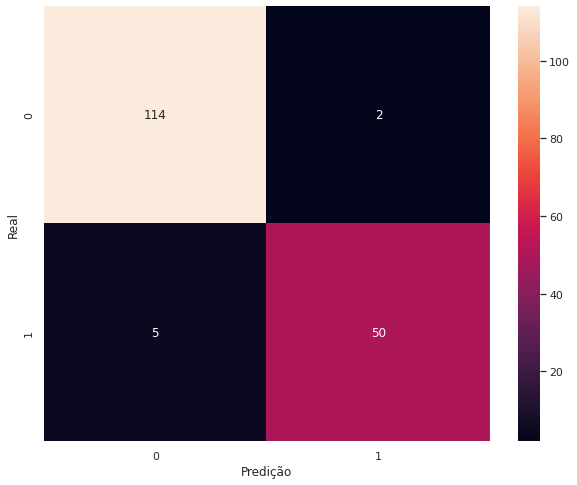

In [ ]:
from sklearn.feature_selection import RFECV

SEED= 200
random.seed(SEED)
# Irei voltar repetir as mesmas decisões, mas agora sem a normalização.
valores_exames_v5 = valores_exames_v1.drop(columns = ['exame_4','exame_29'])
valores_exames_v6 = valores_exames_v5.drop(columns = var_corr.keys()[::2]) 

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, 
                                                        diagnostico,
                                                        test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=200)
classificador.fit(treino_x, treino_y)
selecionador_rfecv = RFECV(estimator = classificador, cv = 5, step = 1, scoring="accuracy") #cv é a divisao de validação cruzada.
selecionador_rfecv.fit(treino_x, treino_y)
treino_rfecv = selecionador_rfecv.transform(treino_x)
teste_rfecv = selecionador_rfecv.transform(teste_x)
classificador.fit(treino_rfecv, treino_y)

matriz_confusao = confusion_matrix(teste_y,classificador.predict(teste_rfecv))
plt.figure(figsize = (10, 8))
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel= "Real")

print("Resultado da classificação %.2f%%" %(classificador.score(teste_rfecv,teste_y)*100))

### Já conseguimos ver um conjunto de resultados interessantes, mas tudo isso acontece por baixos dos panos. Então para ir mais afundo e entender melhor, vamos descobrir que colunas(exames) são esses que o RFECV escolheu?

In [ ]:
treino_x.columns[selecionador_rfecv.support_]

Index(['exame_2', 'exame_3', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_10', 'exame_11', 'exame_12', 'exame_14', 'exame_15',
       'exame_16', 'exame_17', 'exame_18', 'exame_19', 'exame_20', 'exame_21',
       'exame_23', 'exame_24', 'exame_25', 'exame_26', 'exame_27', 'exame_28',
       'exame_30', 'exame_31', 'exame_32'],
      dtype='object')

In [ ]:
num_features=len(selecionador_rfecv.grid_scores_)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


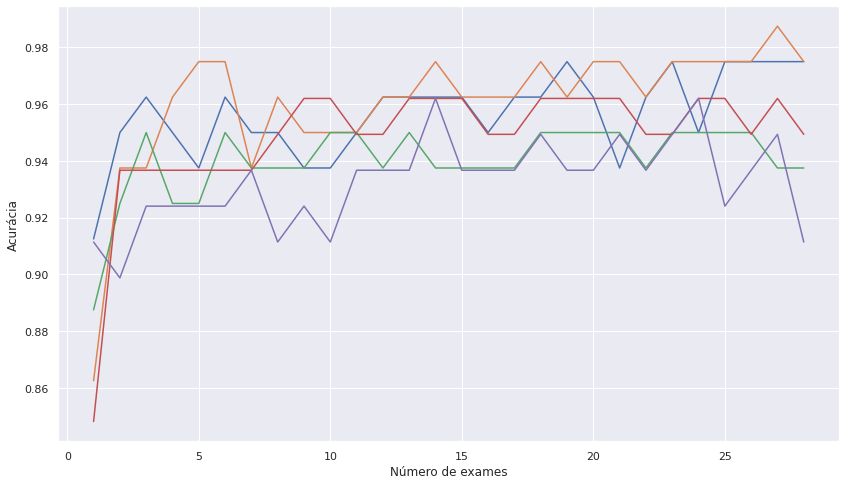

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (14, 8))
plt.xlabel("Número de exames")
plt.ylabel("Acurácia")
plt.plot(range(1, num_features +1), selecionador_rfecv.grid_scores_)
plt.show()

### Podemos ver que tivemos resultados ate acima de 98%, mas isso acontece, pois o retorno de grid_scores_ é uma média dos scores de cada um dos blocos entre os quais nosso conjunto foi dividido, e não um valor real. Todos os métodos(SelectKBest, RFE e RFECV) selecionaram e filtraram as features, isso explica serem chamados de "métodos de seleção de features" (feature selection methods). Mas será que existe outro tipo de método?

In [ ]:
valores_exames_v6.head()

,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
valores_exames_v7 = selecionador_rfe.transform(valores_exames_v6)
valores_exames_v7

array([[1.228e+02, 1.471e-01, 1.846e+02, 2.019e+03, 2.654e-01],
       [1.329e+02, 7.017e-02, 1.588e+02, 1.956e+03, 1.860e-01],
       [1.300e+02, 1.279e-01, 1.525e+02, 1.709e+03, 2.430e-01],
       ...,
       [1.083e+02, 5.302e-02, 1.267e+02, 1.124e+03, 1.418e-01],
       [1.401e+02, 1.520e-01, 1.846e+02, 1.821e+03, 2.650e-01],
       [4.792e+01, 0.000e+00, 5.916e+01, 2.686e+02, 0.000e+00]])

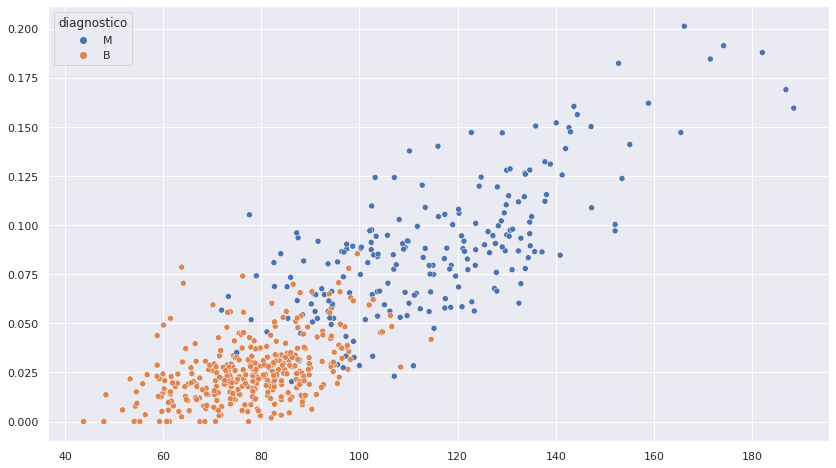

In [ ]:
import seaborn as sns
plt.figure(figsize=(14,8))
sns.scatterplot(x = valores_exames_v7[:,0] , y = valores_exames_v7[:,1], hue = diagnostico)

### Mesmo com uma boa acurácia, com o que temos fica difícil ter uma boa visualização, então para poder entender melhor nossos pontos. Vamos aplicar o PCA nos nossos dados e verificar como ficará a visualização.

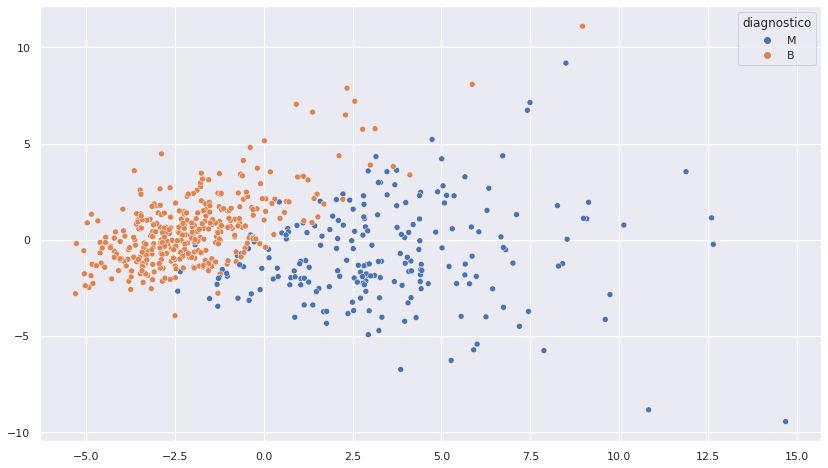

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
valores_exames_v8 = pca.fit_transform(valores_exames_v4) # temos que utilziar a V4 pois a base esta normalizada, sem isso teremos dados confusos
plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v8[:,0], y = valores_exames_v8[:,1], hue = diagnostico)

### Dessa forma, conseguiremos enxergar de maneira mais clara onde existem pontos com maiores confusões, traçando uma linha que dividirá os cânceres dos tipos maligno ou benigno. Ainda existe uma técnica que se comporta melhor quando queremos gerar visualizações, chamada t-SNE, que também está presente no SKlearn. De maneira resumida, a t-SNE tenta manter as distâncias entre os pontos minimizando a dificuldade de visualização. 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


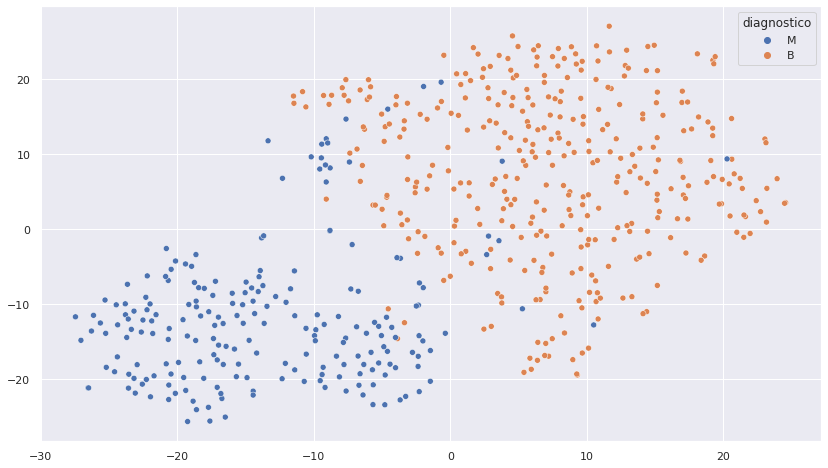

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
valores_exames_v9 = tsne.fit_transform(valores_exames_v4)

plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v9[:,0], y = valores_exames_v9[:,1], hue = diagnostico)

### O t-Distributed Stochastic Neighbor Embedding (TSNE), mapeia os dados multidimensionais para um espaço dimensional inferior e tenta encontrar padrões nos dados identificando clusters observados com base na semelhança de pontos de dados com vários recursos.TSNE é uma técnica usada principalmente em exploração e visualização de dados.